In [26]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import re # for matching image file name classes
import random

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# source: https://thispointer.com/python-how-to-get-list-of-files-in-directory-and-sub-directories/
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

Here, we read in all the image files from the raw image folder ("Pictures for AI") and then sequentially number then into two groups: "Improbable" and "Probable".

In [3]:
raw_image_dir = '../../data/raw/Pictures for AI'
image_file_list = getListOfFiles(raw_image_dir)

In [24]:
for filename in image_file_list:
    if '.JPG' in filename or '.jpg' in filename:        
        pass
    else:
        print(filename)

../../data/raw/Pictures for AI/Site 42/Site 42_Infrastructure.docx
../../data/raw/Pictures for AI/Site 67/Site 47_Infrastructure.docx
../../data/raw/Pictures for AI/Site 41/Site 41_Infrastructure.docx


In [25]:
probable_counter = 1
improbable_counter = 1
tidy_image_dir = '../../data/tidy/labeled_images/'
if not os.path.exists(tidy_image_dir):
    os.makedirs(tidy_image_dir)
for filename in image_file_list:
    if '.JPG' in filename or '.jpg' in filename:        
        if any(re.findall(r'improbable', filename, re.IGNORECASE)):
            save_name = tidy_image_dir + 'improbable' + '-' + str(improbable_counter) + '.jpg'
            improbable_counter += 1
        elif any(re.findall(r'probable|possible', filename, re.IGNORECASE)):
            save_name = tidy_image_dir + 'probable' + '-' + str(probable_counter) + '.jpg'
            probable_counter += 1   
        imageio.imwrite(save_name, np.array(Image.open(filename)))
print('Number of probable images saved:', probable_counter-1)
print('Number of improbable images saved:', improbable_counter-1) 

Number of probable images saved: 103
Number of improbable images saved: 259


In [31]:
def label_img(name):
  word_label = name.split('-')[0]
  if word_label == 'probable' : 
        return np.array([1, 0])
  elif word_label == 'improbable' : 
    return np.array([0, 1])

In [28]:
random.sample(image_file_list, int(.8*len(image_file_list)))

['../../data/raw/Pictures for AI/Site 128/Possible (multi stem codominant union at line height).JPG',
 '../../data/raw/Pictures for AI/Site 72/Improbable (2).JPG',
 '../../data/raw/Pictures for AI/Site 52/Improbable (4).JPG',
 '../../data/raw/Pictures for AI/Site 44/IMG-4283.JPG',
 '../../data/raw/Pictures for AI/Site 29/Probable (deadwood above line hieght, vine).JPG',
 '../../data/raw/Pictures for AI/Site 22/Improbable (3).JPG',
 '../../data/raw/Pictures for AI/Site 48/Improbable.JPG',
 '../../data/raw/Pictures for AI/Site 136/Possible (low codominant stem).JPG',
 '../../data/raw/Pictures for AI/Site 112/Possible (3 codominant stems with low crotch, included bark).JPG',
 '../../data/raw/Pictures for AI/Site 14/8 - Possible(dead limbs, bad angles, topped).JPG',
 '../../data/raw/Pictures for AI/Site 1/Improbable 3.JPG',
 '../../data/raw/Pictures for AI/Site 179/10 - Improbable.JPG',
 '../../data/raw/Pictures for AI/Site 155/Improbable (umbrella pine).JPG',
 '../../data/raw/Pictures for

In [32]:
#IMG_SIZE = 300
DIR = '../../data/tidy/labeled_images'
def load_training_data():
    train_data = []
    image_list = os.listdir(DIR)
    training_image_list = random.sample(image_list, int(.9*len(image_list))) # take 90% of image data for traing
    for img in training_image_list:
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        img = img.convert('L') # convert image to monochrome - this works
        #img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])    
    
#     # Basic Data Augmentation - Horizontal Flipping
#     flip_img = Image.open(path)
#     flip_img = flip_img.convert('L')
#     flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
#     flip_img = np.array(flip_img)
#     flip_img = np.fliplr(flip_img)
#     train_data.append([flip_img, label])  
#    shuffle(train_data)
    return train_data

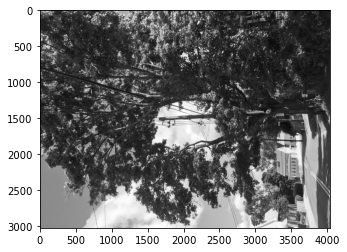

In [33]:
train_data = load_training_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')

In [ ]:
model = models.Sequential([
    layers.Conv2D(64, 7, activation="relu", padding="same", input_shape = [28, 28, 1 ]), #input shape of course needs to be changed
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, activation="relu", padding="same"),
    layers.Conv2D(256, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])